<a href="https://colab.research.google.com/github/mulgreat/ELEC-6601/blob/main/Programming%20Assignment%20%233_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-5224d13f8430>:51: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(n, x, basefmt=" ", use_line_collection=True)
<ipython-input-1-5224d13f8430>:56: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(n[:len(x_d)], x_d, basefmt=" ", use_line_collection=True)
<ipython-input-1-5224d13f8430>:61: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionall

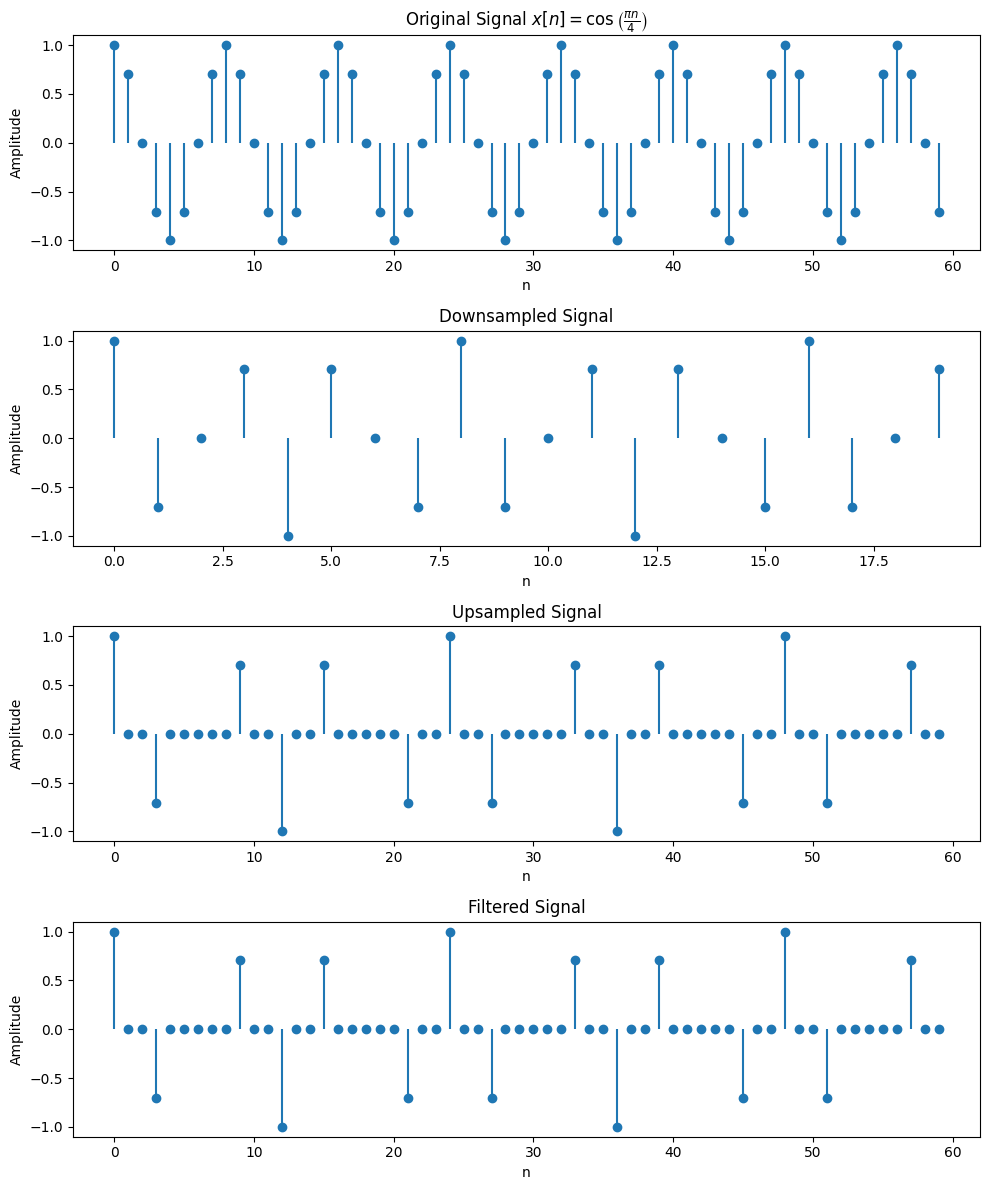

Signal 1 processed and plotted.


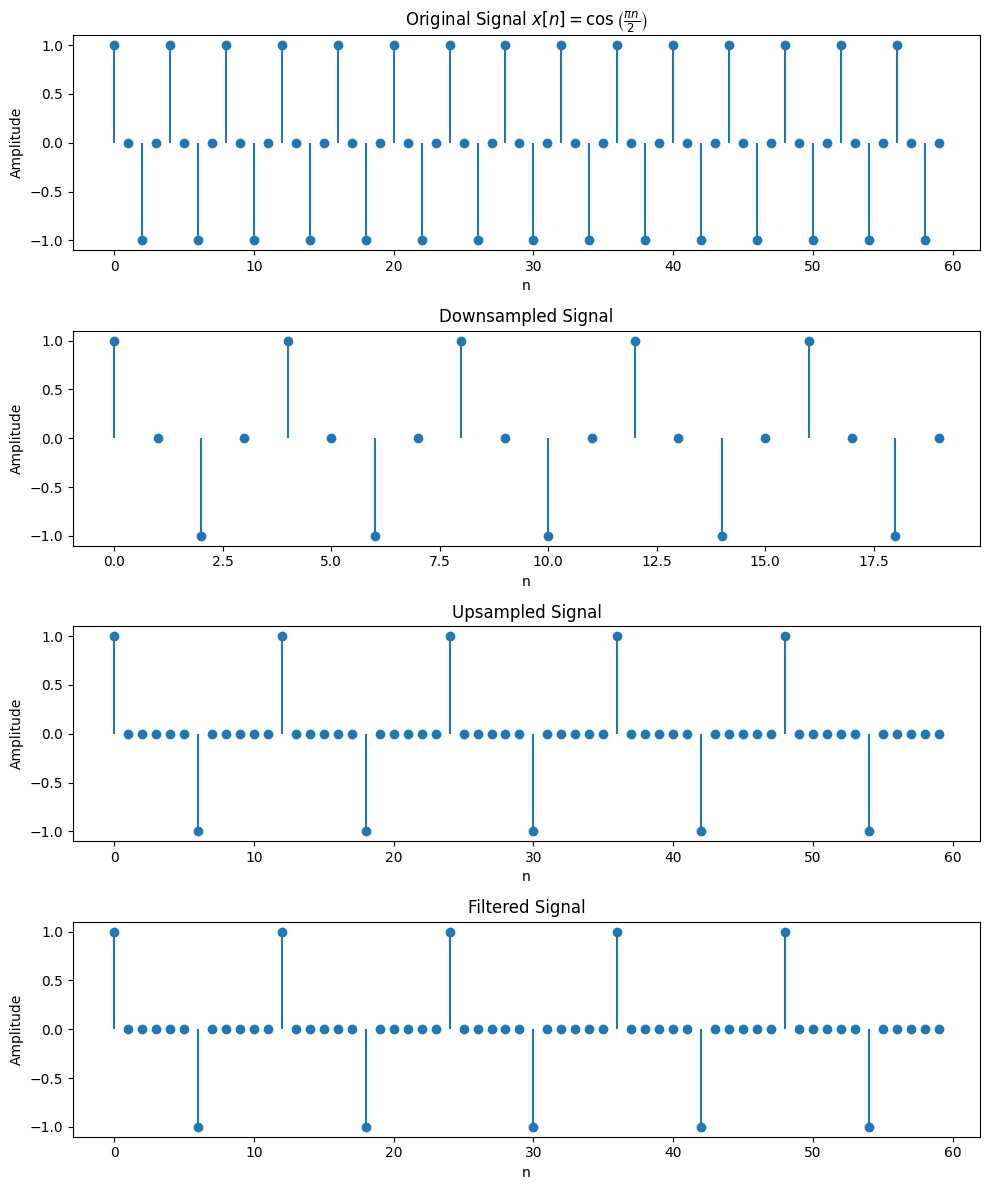

Signal 2 processed and plotted.


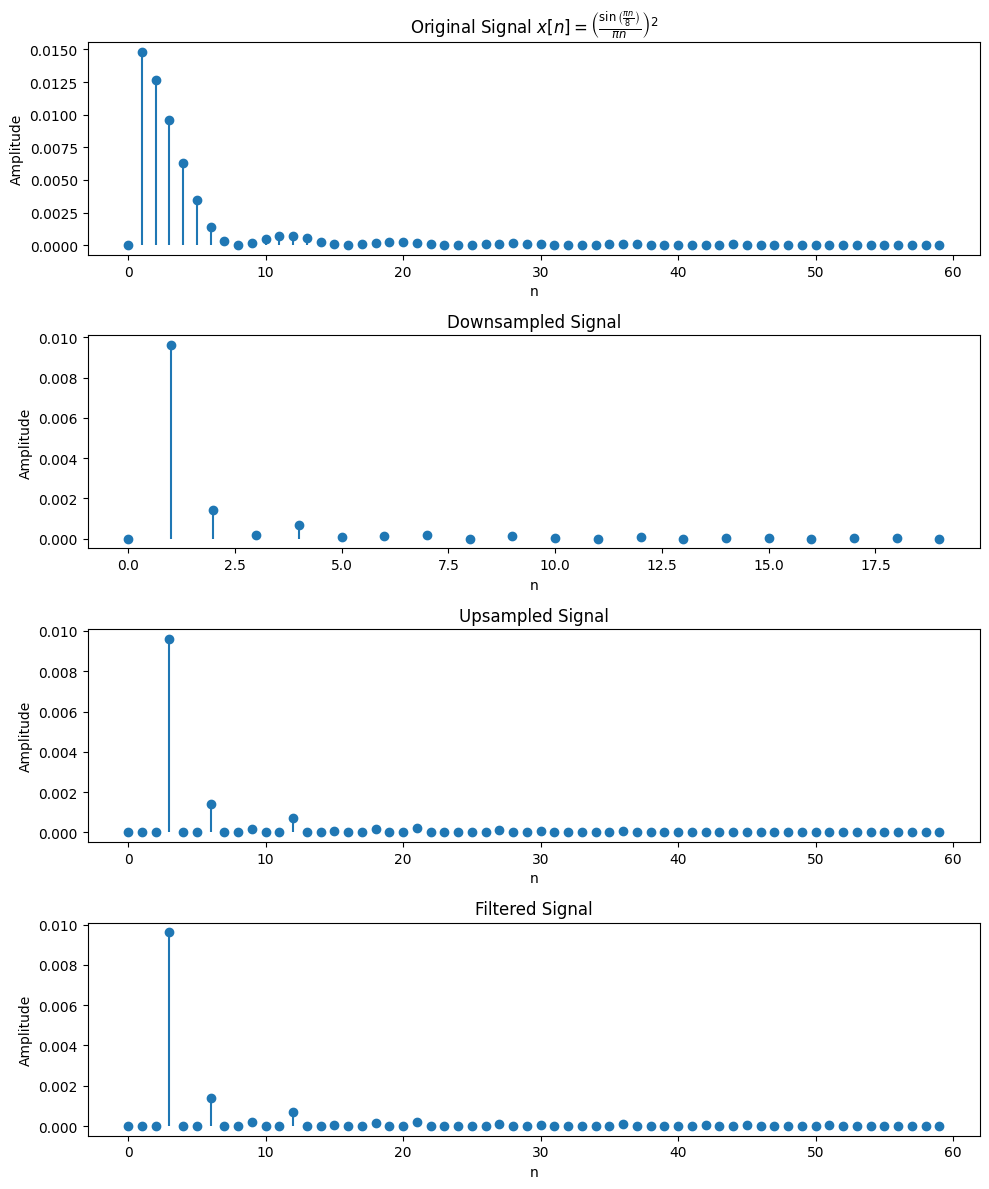

Signal 3 processed and plotted.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def downsample(x, factor):
    return x[::factor]

def upsample(x, factor):
    upsampled = np.zeros(len(x) * factor)
    upsampled[::factor] = x
    return upsampled

def filter_signal(x, low, high, fs):
    X = np.fft.fft(x)
    freqs = np.fft.fftfreq(len(x), 1/fs)
    X[(freqs < low) | (freqs > high)] = 0
    return np.fft.ifft(X).real

# Define the signals
n = np.arange(0, 60)
x_a = np.cos(np.pi * n / 4)
x_b = np.cos(np.pi * n / 2)
x_c = (np.sin(np.pi * n / 8) / (np.pi * n + 1e-8)) ** 2  # Adding small epsilon to avoid division by zero

# Define the parameters
downsample_factor = 3
upsample_factor = 3
fs = 1  # Sampling frequency
low_freq = -np.pi/3
high_freq = np.pi/3

signals = [x_a, x_b, x_c]
titles = [
    r'$x[n] = \cos\left(\frac{\pi n}{4}\right)$',
    r'$x[n] = \cos\left(\frac{\pi n}{2}\right)$',
    r'$x[n] = \left(\frac{\sin\left(\frac{\pi n}{8}\right)}{\pi n}\right)^2$'
]

for i, x in enumerate(signals):
    # Downsample
    x_d = downsample(x, downsample_factor)

    # Upsample
    x_e = upsample(x_d, upsample_factor)

    # Filter
    x_r = filter_signal(x_e, low_freq, high_freq, fs)

    # Plotting
    fig, axes = plt.subplots(4, 1, figsize=(10, 12))

    axes[0].stem(n, x, basefmt=" ", use_line_collection=True)
    axes[0].set_title(f'Original Signal {titles[i]}')
    axes[0].set_xlabel('n')
    axes[0].set_ylabel('Amplitude')

    axes[1].stem(n[:len(x_d)], x_d, basefmt=" ", use_line_collection=True)
    axes[1].set_title('Downsampled Signal')
    axes[1].set_xlabel('n')
    axes[1].set_ylabel('Amplitude')

    axes[2].stem(n, x_e[:len(n)], basefmt=" ", use_line_collection=True)
    axes[2].set_title('Upsampled Signal')
    axes[2].set_xlabel('n')
    axes[2].set_ylabel('Amplitude')

    axes[3].stem(n, x_r[:len(n)], basefmt=" ", use_line_collection=True)
    axes[3].set_title('Filtered Signal')
    axes[3].set_xlabel('n')
    axes[3].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

    print(f"Signal {i+1} processed and plotted.")
